In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Importing and Preprocessing

In [74]:
df = pd.read_csv('trace_data/trace_df.csv', index_col=0)
pd.options.display.max_columns = None
display(df)

,reg_method,weight,loss,forget_rate,xQf,alpha,xQr,correlated_update,perseveration_bias,xH,beta,sindy_beta
0,2nd_approach,0.0,0.568443,0.0,0.979 xQf[k],0.25,0.033 1 + 0.800 xQr[k] + 0.164 cr[k],False,0.0,1.005 xH[k],3.0,2.824667
1,2nd_approach,0.0,0.574229,0.0,1.118 xQf[k],0.25,0.842 xQr[k] + 0.159 cr[k],False,0.0,1.005 xH[k],3.0,3.128613
2,2nd_approach,0.0,0.588446,0.0,0.544 xQf[k],0.25,0.056 1 + 0.847 xQr[k] + 0.097 cr[k],False,0.0,1.026 xH[k],3.0,4.076478
3,2nd_approach,0.0,0.539112,0.0,0.962 xQf[k],0.25,0.867 xQr[k] + 0.140 cr[k],False,0.0,1.012 xH[k],3.0,2.744825
4,2nd_approach,0.0,0.923614,0.0,0.075 1 + 0.863 xQf[k],0.25,-0.048 1 + 0.814 xQr[k] + 0.088 cr[k],False,0.0,1.002 xH[k],3.0,4.985409
...,...,...,...,...,...,...,...,...,...,...,...,...
250,2nd_approach,10.0,0.657660,0.0,0.982 xQf[k],0.25,0.998 xQr[k],False,0.0,1.005 xH[k],3.0,2.211292
251,2nd_approach,10.0,0.664646,0.0,0.989 xQf[k],0.25,0.996 xQr[k],False,0.0,1.003 xH[k],3.0,3.796243
252,2nd_approach,10.0,0.684720,0.0,0.991 xQf[k],0.25,0.998 xQr[k],False,0.0,1.002 xH[k],3.0,3.926844
253,2nd_approach,10.0,0.632569,0.0,0.988 xQf[k],0.25,0.999 xQr[k],False,0.0,1.002 xH[k],3.0,2.444233


In [75]:
# extracting alpha
df['sindy_alpha'] = df['xQr'].str.extract(r'\+ (\d+\.\d+) cr\[k\]').astype(float)
# comparing alphas
df['d_alpha'] = df['sindy_alpha'] - df['alpha']
#comparing betas
df['d_beta'] = df['sindy_beta'] - df['beta']

In [76]:
# grouping the weights and use average
df = df.groupby('weight')[['loss', 'd_alpha', 'd_beta']].mean().reset_index()
print(df)

       weight      loss   d_alpha    d_beta
0    0.000000  0.638769 -0.120400  0.551998
1    0.000010  0.631289 -0.123250  2.724441
2    0.000013  0.600926 -0.126200  2.204800
3    0.000018  0.576377 -0.112400  0.646420
4    0.000023  0.569098 -0.135000  1.352547
5    0.000031  0.573625 -0.120200  2.604091
6    0.000041  0.586979 -0.150600  2.073648
7    0.000054  0.564007 -0.098400  0.508811
8    0.000072  0.592758 -0.146600  2.098049
9    0.000095  0.683970 -0.191600  4.377176
10   0.000126  0.631819 -0.114000  2.764355
11   0.000168  0.598444 -0.135500  1.943982
12   0.000222  0.576142 -0.133200  0.692110
13   0.000295  0.586479 -0.168400  3.618763
14   0.000391  0.575796 -0.148200  2.873671
15   0.000518  0.583834 -0.122800  1.172772
16   0.000687  0.685264 -0.146200  4.113719
17   0.000910  0.583123 -0.145600  1.890936
18   0.001207  0.568519 -0.123200  1.534797
19   0.001600  0.593339 -0.119800  1.328241
20   0.002121  0.578034 -0.139400  2.488320
21   0.002812  0.626306 -0.14900

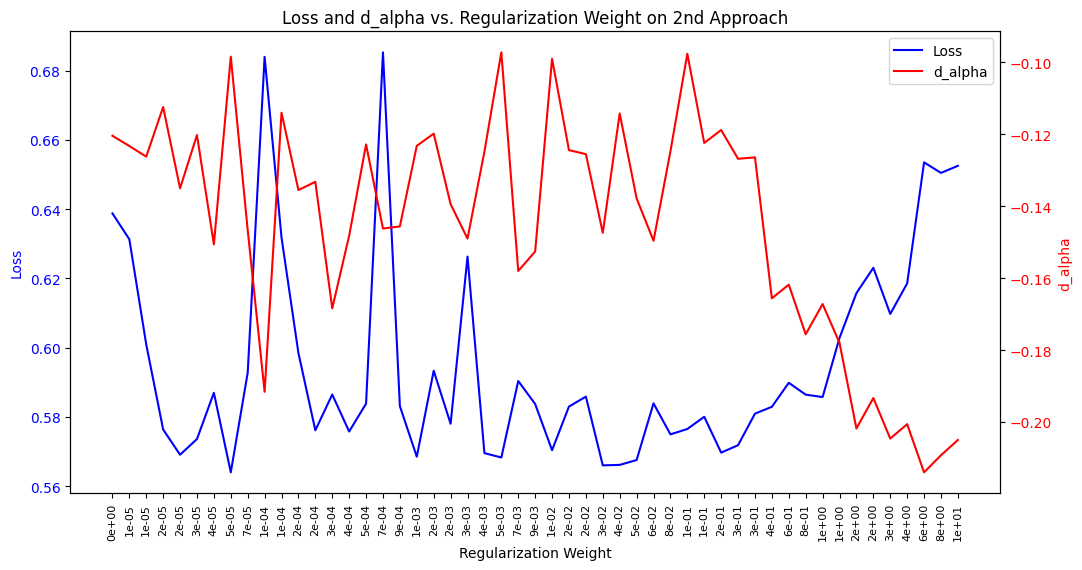

In [77]:
def scientific_format(x, pos):
    return f'{x:.0e}'

# Create a formatter
formatter = FuncFormatter(scientific_format)

# Plot using indices for equal spacing
indices = range(len(df))
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first line (Loss vs. Regularization Weight) on the primary y-axis
ax1.plot(indices, df['loss'], label='Loss', color='blue', linestyle='-')
ax1.set_xlabel('Regularization Weight')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(indices)
ax1.set_xticklabels([scientific_format(x, None) for x in df['weight']], rotation='vertical', fontsize=8)

# Add a grid
ax1.grid(False)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second line on the secondary y-axis
ax2.plot(indices, df['d_alpha'], label='d_alpha', color='red', linestyle='-')
ax2.set_ylabel('d_alpha', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('Loss and d_alpha vs. Regularization Weight on 2nd Approach')

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Display the plot
plt.show()

There either seems to be no linear correlation between the weight and the loss / alpha or the variance is too big and each training is very different from each other.

Lets train a model 20 times using the same weight and see how consistent those results are:

In [70]:
df_max = pd.read_csv('trace_data/max_alpha_df.csv', index_col=0)
display(df_max)

,reg_method,weight,loss,forget_rate,xQf,alpha,xQr,correlated_update,perseveration_bias,xH,beta,sindy_beta
0,2nd_approach,0.015264,0.622027,0.0,0.967 xQf[k],0.25,0.044 1 + 0.793 xQr[k] + 0.037 cr[k],False,0.0,1.007 xH[k],3.0,9.955222
1,2nd_approach,0.015264,0.557516,0.0,0.992 xQf[k],0.25,0.082 1 + 0.787 xQr[k] + 0.083 cr[k],False,0.0,0.998 xH[k],3.0,5.125634
2,2nd_approach,0.015264,0.589719,0.0,0.997 xQf[k],0.25,0.108 1 + 0.837 xQr[k] + 0.054 cr[k],False,0.0,1.005 xH[k],3.0,7.187761
3,2nd_approach,0.015264,0.711379,0.0,0.916 xQf[k],0.25,0.032 1 + 0.900 xQr[k] + 0.035 cr[k],False,0.0,0.997 xH[k],3.0,7.697121
4,2nd_approach,0.015264,0.587327,0.0,0.975 xQf[k],0.25,0.818 xQr[k] + 0.063 cr[k],False,0.0,1.019 xH[k],3.0,6.736153
5,2nd_approach,0.015264,0.852540,0.0,0.041 1 + 0.820 xQf[k],0.25,-0.040 1 + 0.837 xQr[k] + 0.065 cr[k],False,0.0,1.015 xH[k],3.0,6.181720
6,2nd_approach,0.015264,0.584875,0.0,0.965 xQf[k],0.25,0.901 xQr[k] + 0.061 cr[k],False,0.0,0.995 xH[k],3.0,7.435946
7,2nd_approach,0.015264,0.562140,0.0,0.984 xQf[k],0.25,0.041 1 + 0.846 xQr[k] + 0.114 cr[k],False,0.0,1.019 xH[k],3.0,3.527079
8,2nd_approach,0.015264,0.559003,0.0,0.985 xQf[k],0.25,0.032 1 + 0.810 xQr[k] + 0.153 cr[k],False,0.0,1.018 xH[k],3.0,2.820907
9,2nd_approach,0.015264,0.561059,0.0,1.004 xQf[k],0.25,0.059 1 + 0.872 xQr[k] + 0.070 cr[k],False,0.0,1.004 xH[k],3.0,5.797745


In [71]:
# extracting alpha
df_max['sindy_alpha'] = df_max['xQr'].str.extract(r'\+ (\d+\.\d+) cr\[k\]').astype(float)
# comparing alphas
df_max['d_alpha'] = df_max['sindy_alpha'] - df_max['alpha']
display(df_max)

,reg_method,weight,loss,forget_rate,xQf,alpha,xQr,correlated_update,perseveration_bias,xH,beta,sindy_beta,sindy_alpha,d_alpha
0,2nd_approach,0.015264,0.622027,0.0,0.967 xQf[k],0.25,0.044 1 + 0.793 xQr[k] + 0.037 cr[k],False,0.0,1.007 xH[k],3.0,9.955222,0.037,-0.213
1,2nd_approach,0.015264,0.557516,0.0,0.992 xQf[k],0.25,0.082 1 + 0.787 xQr[k] + 0.083 cr[k],False,0.0,0.998 xH[k],3.0,5.125634,0.083,-0.167
2,2nd_approach,0.015264,0.589719,0.0,0.997 xQf[k],0.25,0.108 1 + 0.837 xQr[k] + 0.054 cr[k],False,0.0,1.005 xH[k],3.0,7.187761,0.054,-0.196
3,2nd_approach,0.015264,0.711379,0.0,0.916 xQf[k],0.25,0.032 1 + 0.900 xQr[k] + 0.035 cr[k],False,0.0,0.997 xH[k],3.0,7.697121,0.035,-0.215
4,2nd_approach,0.015264,0.587327,0.0,0.975 xQf[k],0.25,0.818 xQr[k] + 0.063 cr[k],False,0.0,1.019 xH[k],3.0,6.736153,0.063,-0.187
5,2nd_approach,0.015264,0.852540,0.0,0.041 1 + 0.820 xQf[k],0.25,-0.040 1 + 0.837 xQr[k] + 0.065 cr[k],False,0.0,1.015 xH[k],3.0,6.181720,0.065,-0.185
6,2nd_approach,0.015264,0.584875,0.0,0.965 xQf[k],0.25,0.901 xQr[k] + 0.061 cr[k],False,0.0,0.995 xH[k],3.0,7.435946,0.061,-0.189
7,2nd_approach,0.015264,0.562140,0.0,0.984 xQf[k],0.25,0.041 1 + 0.846 xQr[k] + 0.114 cr[k],False,0.0,1.019 xH[k],3.0,3.527079,0.114,-0.136
8,2nd_approach,0.015264,0.559003,0.0,0.985 xQf[k],0.25,0.032 1 + 0.810 xQr[k] + 0.153 cr[k],False,0.0,1.018 xH[k],3.0,2.820907,0.153,-0.097
9,2nd_approach,0.015264,0.561059,0.0,1.004 xQf[k],0.25,0.059 1 + 0.872 xQr[k] + 0.070 cr[k],False,0.0,1.004 xH[k],3.0,5.797745,0.070,-0.180


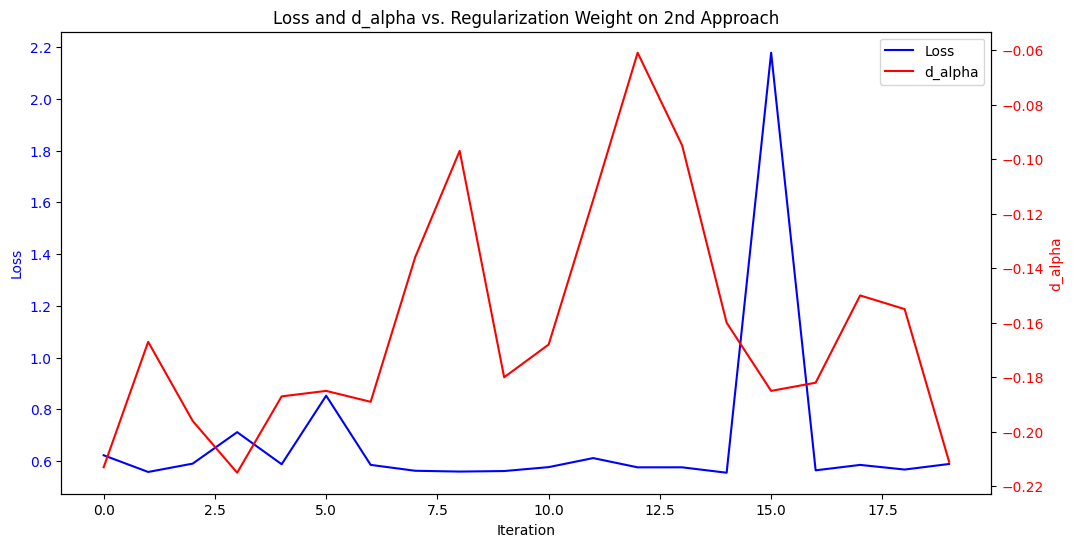

In [72]:
# Plot using default indices
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first line (Loss vs. Regularization Weight) on the primary y-axis
ax1.plot(df_max['loss'], label='Loss', color='blue', linestyle='-')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add a grid
ax1.grid(False)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second line on the secondary y-axis
ax2.plot(df_max['d_alpha'], label='d_alpha', color='red', linestyle='-')
ax2.set_ylabel('d_alpha', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('Loss and d_alpha vs. Regularization Weight on 2nd Approach')

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Display the plot
plt.show()


Even though the same weight was used, there is a big fluctuation. In order to get meaningful results, each weight has to be checked several times. 

In [79]:
df_bd = pd.read_csv('trace_data/bd_trace_df.csv', index_col=0)
display(df_bd)

,reg_method,weight,loss,forget_rate,xQf,alpha,xQr,correlated_update,perseveration_bias,xH,beta,sindy_beta
0,2nd_approach,0.000000,0.566692,0.0,0.975 xQf[k],0.25,0.857 xQr[k] + 0.146 cr[k],False,0.0,0.999 xH[k],3.0,2.957108
1,2nd_approach,0.000000,0.560302,0.0,0.978 xQf[k],0.25,0.052 1 + 0.803 xQr[k] + 0.150 cr[k],False,0.0,1.011 xH[k],3.0,3.143903
2,2nd_approach,0.000000,0.557598,0.0,0.952 xQf[k],0.25,0.841 xQr[k] + 0.170 cr[k],False,0.0,1.023 xH[k],3.0,2.930171
3,2nd_approach,0.000000,0.566026,0.0,0.980 xQf[k],0.25,0.868 xQr[k] + 0.145 cr[k],False,0.0,0.989 xH[k],3.0,3.111761
4,2nd_approach,0.000000,0.577669,0.0,1.044 xQf[k],0.25,0.858 xQr[k] + 0.143 cr[k],False,0.0,0.987 xH[k],3.0,2.946845
...,...,...,...,...,...,...,...,...,...,...,...,...
335,2nd_approach,0.000687,0.588730,0.0,0.969 xQf[k],0.25,0.808 xQr[k] + 0.193 cr[k],False,0.0,1.009 xH[k],3.0,2.282972
336,2nd_approach,0.000687,0.554330,0.0,0.990 xQf[k],0.25,0.838 xQr[k] + 0.168 cr[k],False,0.0,1.006 xH[k],3.0,2.573264
337,2nd_approach,0.000687,0.569174,0.0,0.850 xQf[k],0.25,0.839 xQr[k] + 0.169 cr[k],False,0.0,1.005 xH[k],3.0,2.748010
338,2nd_approach,0.000687,0.551841,0.0,0.960 xQf[k],0.25,0.805 xQr[k] + 0.199 cr[k],False,0.0,1.017 xH[k],3.0,2.449445


In [81]:
# extracting alpha
df_bd['sindy_alpha'] = df_bd['xQr'].str.extract(r'\+ (\d+\.\d+) cr\[k\]').astype(float)
# comparing alphas
df_bd['d_alpha'] = df_bd['sindy_alpha'] - df_bd['alpha']
#comparing betas
df_bd['d_beta'] = df_bd['sindy_beta'] - df_bd['beta']

In [87]:
# grouping the weights and use average
df_bd = df_bd.groupby('weight')[['loss', 'd_alpha', 'd_beta']].mean().reset_index()
print(df_bd)

      weight      loss   d_alpha    d_beta
0   0.000000  0.565531 -0.095900  0.027788
1   0.000010  0.568323 -0.088350 -0.083309
2   0.000013  0.569883 -0.090263  0.712139
3   0.000018  0.572727 -0.098050  0.050471
4   0.000023  0.577568 -0.098789  0.626961
5   0.000031  0.571037 -0.092050 -0.099635
6   0.000041  0.570869 -0.098200  0.040274
7   0.000054  0.571444 -0.098500  0.037322
8   0.000072  0.570787 -0.100750  0.042675
9   0.000095  0.566121 -0.093700 -0.027937
10  0.000126  0.566263 -0.085100 -0.166372
11  0.000168  0.565599 -0.084450 -0.119267
12  0.000222  0.568199 -0.097200  0.005621
13  0.000295  0.564278 -0.090000 -0.066633
14  0.000391  0.562710 -0.091800 -0.044618
15  0.000518  0.568774 -0.097200  0.034832
16  0.000687  0.567393 -0.093400 -0.059555


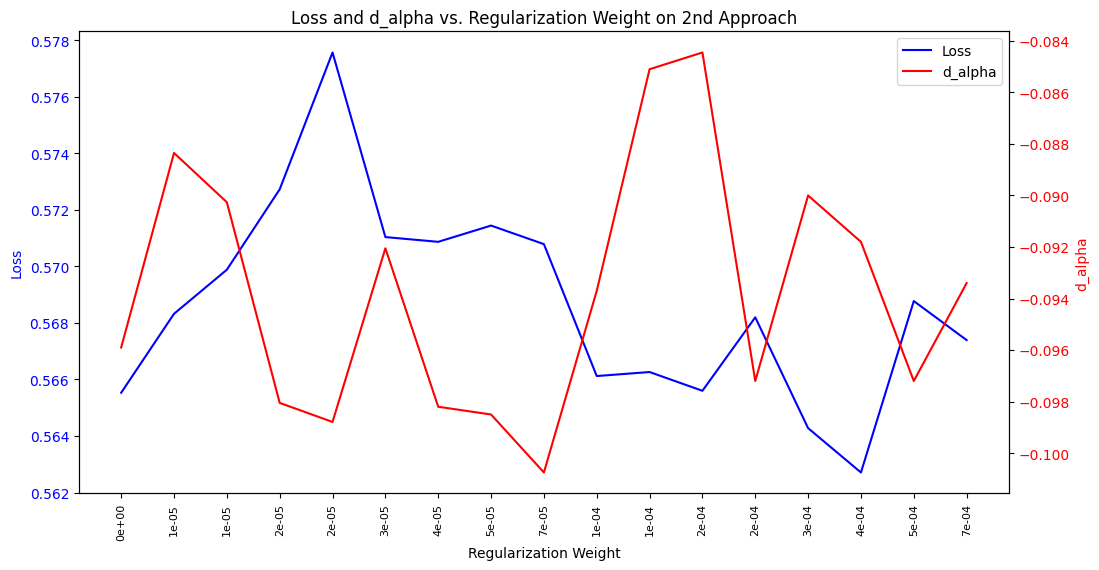

In [88]:
# Plot using indices for equal spacing
indices = range(len(df_bd))
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first line (Loss vs. Regularization Weight) on the primary y-axis
ax1.plot(indices, df_bd['loss'], label='Loss', color='blue', linestyle='-')
ax1.set_xlabel('Regularization Weight')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(indices)
ax1.set_xticklabels([scientific_format(x, None) for x in df_bd['weight']], rotation='vertical', fontsize=8)

# Add a grid
ax1.grid(False)

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second line on the secondary y-axis
ax2.plot(indices, df_bd['d_alpha'], label='d_alpha', color='red', linestyle='-')
ax2.set_ylabel('d_alpha', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('Loss and d_alpha vs. Regularization Weight on 2nd Approach')

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Display the plot
plt.show()